<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Lucas Alvarez P.
- Nombre de alumno 2: Benjamin Villaseca

### **Link de repositorio de GitHub:** https://github.com/lucasssalvarez11/lucasssalvarez11

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Miercoles a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [ ]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# ruta del archivo
path = '/content/drive/MyDrive/Colab Notebooks/Lab Programacion Cientifica /Laboratorios /Lab10/energia_homero.csv'
df = pd.read_csv(path)

# poner como datetime el "date"
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
# grafico del consumo energetico diario
fig = px.line(df, x='date', y='Energy_kWh',
              title='Consumo diario de energía en el hogar de Homero (kWh)',
              labels={'date': 'Fecha', 'Energy_kWh': 'Energía (kWh)'})
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [ ]:

# Asegurar orden y frecuencia diaria (rellena huecos con NaN )
df = df.sort_values('date').copy()
df = df.set_index('date').asfreq('D')

# Definir corte
cut_train = pd.Timestamp('2020-02-29')
cut_test  = pd.Timestamp('2020-03-01')

y = df['Energy_kWh']

y_train = y.loc[:cut_train]
y_test  = y.loc[cut_test:]

# Conjuntos X para pasar por los Pipelines (usaremos el índice de fechas dentro de los transformadores)
X_train = y_train.to_frame()
X_test  = y_test.to_frame()
X_full  = y.to_frame()


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

class TrendFeaturizer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        # Guardamos la primera fecha del entrenamiento para referencia
        self.t0_ = X.index.min()
        return self

    def transform(self, X):
        t = (X.index - self.t0_).days.astype(float).values.reshape(-1, 1)
        return t

Pipeline_trend = Pipeline([
    ('trend_feats', TrendFeaturizer()),
    ('linreg', LinearRegression())
])


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Entrenar en train
Pipeline_trend.fit(X_train, y_train)

# Predicciones
yhat_train_trend = pd.Series(Pipeline_trend.predict(X_train), index=X_train.index, name='yhat_trend')
yhat_test_trend  = pd.Series(Pipeline_trend.predict(X_test),  index=X_test.index,  name='yhat_trend')
yhat_full_trend  = pd.Series(Pipeline_trend.predict(X_full),  index=X_full.index,  name='yhat_trend')

# MAE
mae_train_trend = mean_absolute_error(y_train, yhat_train_trend)
mae_test_trend  = mean_absolute_error(y_test,  yhat_test_trend)
print({'MAE_train_trend': mae_train_trend, 'MAE_test_trend': mae_test_trend})

# Gráfico: real vs. predicción (intervalo completo)
plt.figure(figsize=(12,4))
plt.plot(y, label='Real')
plt.plot(yhat_full_trend, label='Pred Trend', linewidth=2)
plt.title('Tendencia (Regresión Lineal) - Real vs Predicción')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.legend(); plt.tight_layout()
plt.show()


In [ ]:
resid_trend_full = (y - yhat_full_trend).rename('resid_trend')

plt.figure(figsize=(12,3))
plt.plot(resid_trend_full)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - Pred Trend)')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout()
plt.show()

Como podemos en el grafico anterior, si hay un efecto estacional ya que se pueden apreciar picos en invierno y bajas en verano con el paso de los años, por lo que se puede ver estacionalidad.

In [ ]:
class FourierFeaturizer(BaseEstimator, TransformerMixin):
    """
    Genera términos de Fourier para capturar estacionalidad periódica.
    P: periodo en días (p.ej., 7 para semanal, 365.25 para anual).
    n: número de pares seno/coseno.
    """
    def __init__(self, P=365.25, n=3):
        self.P = P
        self.n = n

    def fit(self, X, y=None):
        # Referencia temporal para t=0
        self.t0_ = X.index.min()
        return self

    def transform(self, X):
        t = (X.index - self.t0_).days.values.astype(float)
        feats = []
        for k in range(1, self.n + 1):
            feats.append(np.sin(2 * np.pi * k * t / self.P))
            feats.append(np.cos(2 * np.pi * k * t / self.P))
        return np.column_stack(feats)

# Determinación de P y n:
# - Dado el contexto (invierno/verano), usa estacionalidad anual: P = 365.25
# - Comienza con n = 3 (capta hasta 3 armónicos; ajusta si sobre/infra-ajuste)
Pipeline_seasonal = Pipeline([
    ('fourier', FourierFeaturizer(P=365.25, n=3)),  # puedes probar también P=7 para semanal
    ('linreg', LinearRegression())
])


In [ ]:
# Entrenar en train
Pipeline_seasonal.fit(X_train, y_train)

# Predicciones
yhat_train_seas = pd.Series(Pipeline_seasonal.predict(X_train), index=X_train.index, name='yhat_seasonal')
yhat_test_seas  = pd.Series(Pipeline_seasonal.predict(X_test),  index=X_test.index,  name='yhat_seasonal')
yhat_full_seas  = pd.Series(Pipeline_seasonal.predict(X_full),  index=X_full.index,  name='yhat_seasonal')

# MAE
mae_train_seas = mean_absolute_error(y_train, yhat_train_seas)
mae_test_seas  = mean_absolute_error(y_test,  yhat_test_seas)
print({'MAE_train_seasonal': mae_train_seas, 'MAE_test_seasonal': mae_test_seas})

# Gráfico: real vs. predicción (intervalo completo)
plt.figure(figsize=(12,4))
plt.plot(y, label='Real')
plt.plot(yhat_full_seas, label='Pred Estacional (Fourier+LR)', linewidth=2)
plt.title('Estacionalidad (Fourier + Regresión Lineal) - Real vs Predicción')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.legend(); plt.tight_layout()
plt.show()


In [ ]:
resid_seas_full = (y - yhat_full_seas).rename('resid_seasonal')

plt.figure(figsize=(12,3))
plt.plot(resid_seas_full)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - Pred Estacional)')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout()
plt.show()

# Comentario guía:
# - Si los residuos reducen el patrón periódico visto antes, el componente estacional fue bien capturado.
# - Si aún observas patrones semanales, prueba añadir otra estacionalidad (p.ej., Fourier con P=7)
#   o combinar tendencia + estacionalidad en un solo modelo.


Aqui podemos notar que se redujo considerablemente la estacionalidad que se vio anteriormente, por lo que esta componente de estacionalidad fue bien capturada. lo que se puede apreciar es que en invierno existe una mayor amplitud en los Kwh consumidos.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [ ]:
!pip -q uninstall -y numpy
!pip -q install numpy==1.26.4

In [ ]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [ ]:
!pip -q uninstall -y prophet fbprophet pystan cmdstanpy
!pip -q cache purge

In [ ]:
!pip -q install prophet==1.1.5 cmdstanpy==1.2.4

In [ ]:
from cmdstanpy import install_cmdstan
install_cmdstan()

In [ ]:
# Instalar (Colab)
!pip -q uninstall -y prophet fbprophet pystan cmdstanpy
!pip -q install prophet==1.1.5 cmdstanpy==1.2.4

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error


# Armar DataFrames para Prophet con columnas 'ds' y 'y'
train_df = y_train.reset_index().rename(columns={'date':'ds', 'Energy_kWh':'y'})
test_df  = y_test.reset_index().rename(columns={'date':'ds',  'Energy_kWh':'y'})


In [ ]:
# Modelo Prophet
m = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)

# Ajuste
m.fit(train_df)

# Dataset de predicción para el conjunto de prueba (solo las fechas del test)
future_test = test_df[['ds']].copy()
forecast_test = m.predict(future_test)

# para graficar todo el intervalo
full_df = pd.DataFrame({'ds': df.index})
forecast_full = m.predict(full_df)


In [ ]:
# Gráfico estándar de Prophet
fig1 = m.plot(forecast_full)
plt.title('Pronóstico Prophet - Intervalo completo')
plt.show()

# Componentes: tendencia y estacionalidades
fig2 = m.plot_components(forecast_full)
plt.show()


In [ ]:
# yhat para train y test desde forecast_full
yhat_full = forecast_full.set_index('ds')['yhat'].reindex(df.index)

yhat_train = yhat_full.loc[y_train.index]
yhat_test  = yhat_full.loc[y_test.index]

mae_train = mean_absolute_error(y_train, yhat_train)
mae_test  = mean_absolute_error(y_test,  yhat_test)
print({'MAE_train_Prophet': mae_train, 'MAE_test_Prophet': mae_test})

In [ ]:
resid_full = (df['Energy_kWh'] - yhat_full).rename('residual')

plt.figure(figsize=(12,3))
plt.plot(resid_full)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - yhat Prophet) - Intervalo completo')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout()
plt.show()


Sí, todavía queda estacionalidad: los residuos suben y bajan en las mismas épocas cada año (sobre todo en temporadas de calor/frío) y allí también “se abren” más. Para mejorar, prueba modo multiplicativo, más fourier_order anual y mantener variables climáticas con lags. Si baja esa ondita repetida, vas por buen camino.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [ ]:
import pandas as pd

# Cargar datos de Frink (ajusta la ruta)
frink_path = '/content/drive/MyDrive/Colab Notebooks/Lab Programacion Cientifica /Laboratorios /Lab10/datos_frink.csv'
frink = pd.read_csv(frink_path)

# Asegurar datetime y renombrar 'date' -> 'ds' para Prophet
frink['date'] = pd.to_datetime(frink['date'], errors='coerce')
frink = frink.rename(columns={'date': 'ds'})

# Selección de EXÓGENAS (ejemplo: promedios para evitar multicolinealidad con min/max)
exog_cols = ['Temp_avg','Dew_avg','Hum_avg','Wind_avg','Press_avg']

# Quedarnos solo con ds + exógenas
frink_exog = frink[['ds'] + exog_cols].copy()

# Construir dataframes completos (train/test ya existen: train_df y test_df con ds,y)
train_exog = pd.merge(train_df, frink_exog, on='ds', how='left')
test_exog  = pd.merge(test_df,  frink_exog, on='ds', how='left')

# También dataframe completo para plots de todo el intervalo:
full_df_exog = pd.merge(
    pd.DataFrame({'ds': pd.to_datetime(df.index)}),
    frink_exog, on='ds', how='left'
)


In [ ]:
from prophet import Prophet

m_x = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False
)

# Registrar cada regresor
for col in exog_cols:
    m_x.add_regressor(col)

# Entrenar con train_exog (debe contener ds, y y las columnas exógenas)
m_x.fit(train_exog)


In [ ]:
# Predicción en TEST: Prophet exige las MISMAS columnas exógenas en el future
future_test_x = test_exog[['ds'] + exog_cols].copy()
forecast_test_x = m_x.predict(future_test_x)

# Predicción en TODO el intervalo para graficar
future_full_x = full_df_exog[['ds'] + exog_cols].copy()
forecast_full_x = m_x.predict(future_full_x)

# Graficar predicción (intervalo completo)
fig_pred = m_x.plot(forecast_full_x)
import matplotlib.pyplot as plt
plt.title('Prophet con regresores - Predicción en intervalo completo')
plt.show()

# Componentes (tendencia y estacionalidades + efecto de regresores)
fig_comp = m_x.plot_components(forecast_full_x)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Alinear yhat a índices train/test
# 1) yhat completo alineado al índice de df
yhat_full_x = forecast_full_x.set_index('ds')['yhat'].reindex(pd.to_datetime(df.index))

# 2) Extraer yhat para TRAIN y TEST (usando los índices originales)
yhat_train_x = yhat_full_x.reindex(train_df['ds'])
yhat_test_x  = yhat_full_x.reindex(test_df['ds'])

# Calcular MAE
mae_train_x = mean_absolute_error(train_df['y'], yhat_train_x)
mae_test_x  = mean_absolute_error(test_df['y'],  yhat_test_x)

print({'MAE_train_Prophet_exog': mae_train_x, 'MAE_test_Prophet_exog': mae_test_x})


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Residuales en TRAIN y TEST
resid_train_x = pd.Series(train_df['y'].values - yhat_train_x.values, index=train_df['ds'], name='resid_train')
resid_test_x  = pd.Series(test_df['y'].values  - yhat_test_x.values,  index=test_df['ds'],  name='resid_test')

# Gráfico residuales TRAIN
plt.figure(figsize=(12,3))
plt.plot(resid_train_x.index, resid_train_x.values)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - Predicho) - TRAIN (Prophet + exógenas)')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout(); plt.show()

# Gráfico residuales TEST
plt.figure(figsize=(12,3))
plt.plot(resid_test_x.index, resid_test_x.values)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - Predicho) - TEST (Prophet + exógenas)')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout(); plt.show()

Sí, hay estacionalidad. En test (mar–jul 2020) los residuos se vuelven sistemáticamente positivos y más volátiles desde mayo, señal de un alza estacional (calor/verano) que el modelo aún no capta del todo; no se ve un patrón semanal fuerte.
Las exógenas sí influyen: comprimen buena parte del error respecto al modelo sin ellas, pero su efecto es parcial: queda sesgo en los picos estacionales. Para cerrar esa brecha, conviene usar modo multiplicativo, más fourier_order anual y lags/interacciones climáticas

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import pacf

# Columnas exógenas a evaluar (ajusta si cambiaste)
exog_cols = ['Temp_avg','Dew_avg','Hum_avg','Wind_avg','Press_avg']

# Unimos train y test para tener el rango continuo de fechas (sin y)
full_dates = pd.DataFrame({'ds': pd.date_range(train_df['ds'].min(), test_df['ds'].max(), freq='D')})
full_exog = pd.merge(full_dates, frink_exog, on='ds', how='left').set_index('ds').sort_index()

# Función para elegir lags significativos por PACF
def select_pacf_lags(series, max_lag=30):
    s = series.astype(float).copy()
    s = s.interpolate(limit_direction='both')
    n = s.shape[0]
    pacf_vals = pacf(s, nlags=max_lag, method='ywmle')
    thresh = 1.96 / np.sqrt(n)
    chosen = [lag for lag in range(1, max_lag+1) if abs(pacf_vals[lag]) > thresh]
    return chosen, pacf_vals

selected_lags = {}
pacf_store = {}

for col in exog_cols:
    lags, pacf_vals = select_pacf_lags(full_exog[col], max_lag=30)
    pacf_store[col] = pacf_vals
    if len(lags) > 3:
        lags = lags[:3]
    selected_lags[col] = lags

print("Lags seleccionados por variable (PACF):")
for k,v in selected_lags.items():
    print(f"  {k}: {v}")

In [ ]:
# Generar las columnas lag sobre el frame completo (para que test tenga sus lags a partir de días previos)
lag_cols = []

full_exog_lagged = full_exog.copy()
for col in exog_cols:
    for L in selected_lags[col]:
        newc = f"{col}_lag{L}"
        full_exog_lagged[newc] = full_exog_lagged[col].shift(L)
        lag_cols.append(newc)

# Construimos versiones con ds para merge
full_exog_lagged = full_exog_lagged.reset_index()

# Merge con train y test (manteniendo ds,y + exógenas originales + lags)
train_lag = pd.merge(train_df, full_exog_lagged, on='ds', how='left')
test_lag  = pd.merge(test_df,  full_exog_lagged, on='ds', how='left')

# Columnas finales de regresores (originales + lags)
regressors_all = exog_cols + lag_cols

print("Total de regresores a usar:", len(regressors_all))


In [ ]:
# Calcular medias SOLO en TRAIN para cada regresor
fill_map = {c: train_lag[c].astype(float).mean() for c in regressors_all}

# Imputar en train y test
for c in regressors_all:
    train_lag[c] = train_lag[c].astype(float).fillna(fill_map[c])
    test_lag[c]  = test_lag[c].astype(float).fillna(fill_map[c])

In [ ]:
from prophet import Prophet

m_lag = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False
)

# Añadimos TODOS los regresores (originales + lags)
for c in regressors_all:
    m_lag.add_regressor(c)

# Entrenar
m_lag.fit(train_lag[['ds','y'] + regressors_all])


In [ ]:
import matplotlib.pyplot as plt

# Para TEST
future_test_lag = test_lag[['ds'] + regressors_all].copy()
forecast_test_lag = m_lag.predict(future_test_lag)

full_lag_for_plot = pd.merge(
    pd.DataFrame({'ds': pd.date_range(train_df['ds'].min(), test_df['ds'].max(), freq='D')}),
    full_exog_lagged[['ds'] + regressors_all],
    on='ds', how='left'
)

# Imputamos con medias del TRAIN por si quedara algún NaN
for c in regressors_all:
    full_lag_for_plot[c] = full_lag_for_plot[c].astype(float).fillna(fill_map[c])

forecast_full_lag = m_lag.predict(full_lag_for_plot)

# Plot predicción en intervalo completo
fig_pred = m_lag.plot(forecast_full_lag)
plt.title('Prophet + exógenas + lags — Predicción (intervalo completo)')
plt.show()

# Componentes (tendencia, estacionalidades y efectos de regresores)
fig_comp = m_lag.plot_components(forecast_full_lag)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Alinear yhat completo a las fechas reales
df_all = pd.concat([train_df[['ds','y']], test_df[['ds','y']]], axis=0).reset_index(drop=True)
yhat_full = forecast_full_lag.set_index('ds')['yhat'].reindex(df_all['ds'])

# Separar indices
train_idx = train_df['ds']
test_idx  = test_df['ds']

yhat_train = yhat_full.reindex(train_idx)
yhat_test  = yhat_full.reindex(test_idx)

mae_train_lag = mean_absolute_error(train_df['y'], yhat_train)
mae_test_lag  = mean_absolute_error(test_df['y'],  yhat_test)

print({'MAE_train_Prophet_exog_lags': mae_train_lag, 'MAE_test_Prophet_exog_lags': mae_test_lag})

In [ ]:
# Series de residuales
resid_train = pd.Series(train_df['y'].values - yhat_train.values, index=train_idx, name='resid_train')
resid_test  = pd.Series(test_df['y'].values  - yhat_test.values,  index=test_idx,  name='resid_test')

# Plots
plt.figure(figsize=(12,3))
plt.plot(resid_train.index, resid_train.values)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - Pred) — TRAIN (Prophet + exógenas + lags)')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3))
plt.plot(resid_test.index, resid_test.values)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - Pred) — TEST (Prophet + exógenas + lags)')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout(); plt.show()

Sí, persiste estacionalidad. En test (mar–jul 2020) los residuos siguen sesgados al alza desde mayo y con mayor dispersión en los meses cálidos, lo que indica un ciclo anual que aún no se captura del todo (no se aprecia un patrón semanal claro).
Impacto de los lags: la inclusión de lags mejora el desempeño: reduce la autocorrelación y comprime parte del error (picos menos frecuentes/intensos que sin lags), pero queda sesgo positivo en los máximos estacionales. Falta ajustar la amplitud estacional (p. ej., modo multiplicativo y mayor fourier_order anual, o añadir lags/transformaciones de temperatura-humedad).

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [ ]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [ ]:
# Dependencias
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Grilla
param_grid = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5],
    'seasonality_prior_scale': [5.0, 10.0, 20.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}


In [ ]:
tuning_results, best_params = optimize_prophet(
    df=train_lag[['ds','y'] + regressors_all].copy(),
    df_to_pred=test_lag[['ds','y'] + regressors_all].copy(),
    features=regressors_all,
    param_grid=param_grid
)

print("Mejores parámetros encontrados:", best_params)
tuning_results.head()


In [ ]:
m_best = Prophet(**best_params)

for c in regressors_all:
    m_best.add_regressor(c)

# Entrenar con TRAIN
m_best.fit(train_lag[['ds','y'] + regressors_all])

In [ ]:
import pandas as pd

# Predicción en TEST
df_prop = m_best.make_future_dataframe(periods=len(test_lag), freq='D')
df_feat = pd.concat([train_lag[regressors_all], test_lag[regressors_all]]).reset_index(drop=True)
df_prop[regressors_all] = df_feat[regressors_all]

forecast_full = m_best.predict(df_prop)
forecast_test = forecast_full[forecast_full['ds'].isin(test_lag['ds'])].reset_index(drop=True)


In [ ]:
import matplotlib.pyplot as plt

fig_pred = m_best.plot(forecast_full)
plt.title('Prophet (mejores hiperparámetros) — Predicción en intervalo completo')
plt.show()

fig_comp = m_best.plot_components(forecast_full)
plt.show()


In [ ]:
# Alinear yhat
yhat_full = forecast_full.set_index('ds')['yhat']

yhat_train = yhat_full.reindex(train_lag['ds'])
yhat_test  = yhat_full.reindex(test_lag['ds'])

mae_train = mean_absolute_error(train_lag['y'], yhat_train)
mae_test  = mean_absolute_error(test_lag['y'],  yhat_test)

print({'MAE_train_best': mae_train, 'MAE_test_best': mae_test})


In [ ]:
# Residuales
resid_train = (train_lag['y'].values - yhat_train.values)
resid_test  = (test_lag['y'].values  - yhat_test.values)

plt.figure(figsize=(12,3))
plt.plot(train_lag['ds'], resid_train)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - Pred) — TRAIN (Prophet optimizado)')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3))
plt.plot(test_lag['ds'], resid_test)
plt.axhline(0, linestyle='--')
plt.title('Residuo (Real - Pred) — TEST (Prophet optimizado)')
plt.xlabel('Fecha'); plt.ylabel('kWh'); plt.tight_layout(); plt.show()

El Prophet optimizado mejora el ajuste: en train los residuos quedan centrados y con menor dispersión, pero en test (mayo–jun 2020) aparecen residuales positivos y más volátiles, señal de subestimación de picos estacionales (amplitud anual aún insuficiente) y sin un patrón semanal claro. En síntesis, generaliza razonablemente, pero falla en los extremos; para afinar, usa modo multiplicativo, sube el fourier_order anual y refuerza exógenas/lags

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [ ]:
!pip install surprise

In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [ ]:
df = pd.read_csv("cervezas.csv")

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de usuarios únicos
n_usuarios = df['userId'].nunique()

# Número de productos únicos
n_productos = df['beerId'].nunique()

# Número total de calificaciones registradas
n_calificaciones = df.shape[0]

# Calificaciones faltantes
faltantes = df['rating'].isna().sum()

# Media de las calificaciones
media_general = df['rating'].mean()

# Media de calificación por producto
media_por_producto = df.groupby('beerId')['rating'].mean()

# Resultados
print(f"Usuarios únicos: {n_usuarios}")
print(f"Productos únicos: {n_productos}")
print(f"Total de calificaciones: {n_calificaciones}")
print(f"Calificaciones faltantes: {faltantes}")
print(f"Media general de calificaciones: {media_general:.2f}")


Usuarios únicos: 706
Productos únicos: 3747
Total de calificaciones: 295059
Calificaciones faltantes: 0
Media general de calificaciones: 3.86


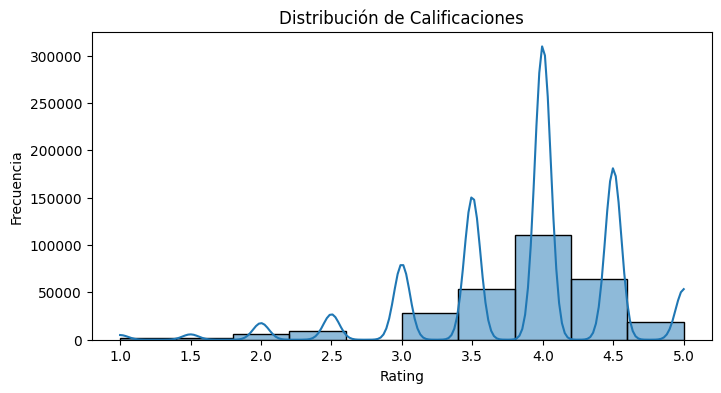

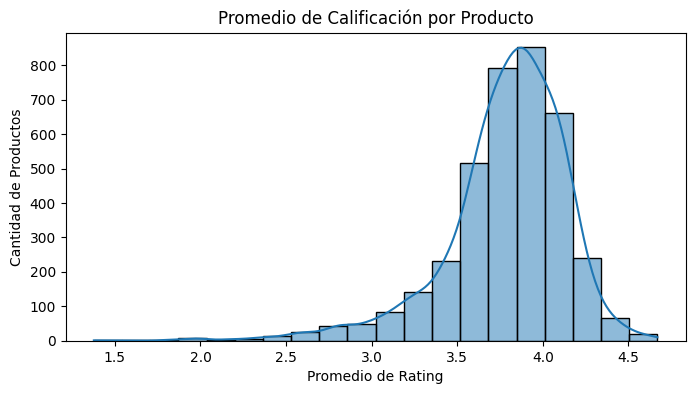

In [ ]:
# Distribución general de calificaciones
plt.figure(figsize=(8,4))
sns.histplot(df['rating'],bins=10, kde=True)
plt.title("Distribución de Calificaciones")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

# Media de calificaciones por producto
plt.figure(figsize=(8,4))
sns.histplot(media_por_producto, bins=20, kde=True)
plt.title("Promedio de Calificación por Producto")
plt.xlabel("Promedio de Rating")
plt.ylabel("Cantidad de Productos")
plt.show()


In [ ]:
# Matriz usuario-producto
matriz = df.pivot_table(index='userId', columns='beerId', values='rating')

# Primeras filas
print(matriz.head())


beerId  5         6         7         9         10        11        14     \
userId                                                                      
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       3.395  3.765217  3.256849  3.478261       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN  3.791908       NaN       NaN   
5         NaN       NaN       NaN       NaN       NaN  3.431818       NaN   
6         NaN       NaN       NaN       NaN       NaN       NaN  3.892157   

beerId  15     17     19     ...  74491  74530  74548  74579  74634  74827  \
userId                       ...                                             
1         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
3         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
5         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [ ]:
# 1) DataFrame con características de cervezas

beers = (
    df[['beerId', 'beerName', 'beerStyle']]
    .drop_duplicates(subset='beerId')
    .reset_index(drop=True)
)

# 2) Bag of Words sobre beerStyle
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=10
)
bow = vectorizer.fit_transform(beers['beerStyle'].fillna(''))
bow_df = pd.DataFrame(
    bow.toarray(),
    index=beers['beerId'],
    columns=vectorizer.get_feature_names_out()
)

# Mapas útiles
name_to_ids = beers.groupby('beerName')['beerId'].apply(list).to_dict()
id_to_name = beers.set_index('beerId')['beerName'].to_dict()

# 3) Función: top-5 cervezas similares por nombre
def top_similares_por_nombre(nombre: str, top: int = 5):

    # Coincidencia exacta
    ids = name_to_ids.get(nombre)

    # Coincidencia parcial si no encontró exacta
    if not ids:
        posibles = beers[beers['beerName'].str.contains(nombre, case=False, na=False)]
        if posibles.empty:
            raise ValueError(f"No se encontró ninguna cerveza que contenga: '{nombre}'")
        # usamos la primera coincidencia parcial mejor calificada globalmente
        global_counts = df.groupby('beerId').size().rename('global_count')
        posibles = posibles.merge(global_counts, on='beerId', how='left').fillna({'global_count':0})
        posibles = posibles.sort_values('global_count', ascending=False)
        bid = int(posibles.iloc[0]['beerId'])
        nombre_base = posibles.iloc[0]['beerName']
    else:
        # si hay duplicados con mismo nombre, tomamos el mejor calificada globalmente
        candidatos = pd.DataFrame({'beerId': ids}).drop_duplicates()
        global_counts = df.groupby('beerId').size().rename('global_count')
        candidatos = candidatos.merge(global_counts, on='beerId', how='left').fillna({'global_count':0})
        candidatos = candidatos.sort_values('global_count', ascending=False)
        bid = int(candidatos.iloc[0]['beerId'])
        nombre_base = nombre

    if bid not in bow_df.index:
        raise ValueError(f"No hay vector de estilo para beerId={bid}")

    # Similaridades
    vec = bow_df.loc[[bid]].values
    sims = cosine_similarity(vec, bow_df.values)[0]

    # Ordenar excluyendo la misma cerveza
    order = sims.argsort()[::-1]
    similares = []
    for idx in order:
        other_id = int(bow_df.index[idx])
        if other_id == bid:
            continue
        similares.append({
            "beerId": other_id,
            "beerName": id_to_name.get(other_id, str(other_id)),
            "similitud": float(sims[idx])
        })
        if len(similares) == top:
            break

    return {
        "base": {"beerId": bid, "beerName": nombre_base},
        "similares": similares
    }

# Chocolate Porte”
print("Top-5 similares a 'Chocolate Porter'")
res_choc = top_similares_por_nombre("Chocolate Porter", top=5)
for i, r in enumerate(res_choc['similares'], 1):
    print(f"{i}) {r['beerName']}")

# 4) Mejor evaluada por Carl
USER_ID = 100
ratings_user = df[df['userId'] == USER_ID]
if ratings_user.empty:
    print(f"El usuario {USER_ID} no tiene calificaciones.")
else:
    max_rating = ratings_user['rating'].max()
    best_rows = ratings_user[ratings_user['rating'] == max_rating][['beerId','beerName']].drop_duplicates()

    # Desempate por popularidad global
    global_counts = df.groupby('beerId').size().rename('global_count')
    best_candidates = best_rows.merge(global_counts, on='beerId', how='left').fillna({'global_count':0})
    best_candidates = best_candidates.sort_values('global_count', ascending=False)

    best_beer_id = int(best_candidates.iloc[0]['beerId'])
    best_beer_name = best_candidates.iloc[0]['beerName']

    print(f"Mejor evaluada por Carl: {best_beer_name} (id={best_beer_id})")

    print(" Top-5 similares a la mejor de Carl")
    res_carl = top_similares_por_nombre(best_beer_name, top=5)
    for i, r in enumerate(res_carl['similares'], 1):
        print(f"{i}) {r['beerName']}")


Top-5 similares a 'Chocolate Porter'
1) Great Lakes Edmund Fitzgerald Porter
2) Generation Porter
3) Whole Stein
4) Benji's Chipotle Smoked Imperial Porter
5) Wolaver's Alta Gracia Coffee Porter
Mejor evaluada por Carl: McNeill's Extra Special Bitter (id=1393)
 Top-5 similares a la mejor de Carl
1) Adnams SSB (Suffolk Special Bitter)
2) Beast Bitter
3) River Horse Special Ale ESB
4) The Wise ESB
5) Anvil Ale ESB


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [ ]:
from surprise.model_selection import train_test_split
from surprise import accuracy
# Solo usamos las columnas necesarias
data = df[['userId', 'beerId', 'rating']]

# Definir rango de calificaciones (normalmente 0.5–5 o 1–5)
reader = Reader(rating_scale=(1, 5))

# 1) Crear dataset para Surprise
dataset = Dataset.load_from_df(data, reader)

# 2) Split train/test con semilla fija para reproducibilidad
trainset, testset = train_test_split(dataset, test_size=0.3, random_state=42)

# 3) Modelo KNN basado en usuarios
sim_options = {
    'name': 'cosine',
    'user_based': True  # True = basado en usuarios
}

model_user = KNNBasic(sim_options=sim_options)
model_user.fit(trainset)

# Predicciones sobre el conjunto de prueba
pred_user = model_user.test(testset)

# 4) Calcular MAE y mostrar resultados
mae_user = accuracy.mae(pred_user, verbose=True)

# Pasar a DataFrame para análisis
pred_df_user = pd.DataFrame([{
    'userId': p.uid,
    'beerId': p.iid,
    'rating_real': p.r_ui,
    'rating_pred': p.est
} for p in pred_user])

print("Modelo KNN basado en usuarios:")
print(pred_df_user.head())

# 5) Modelo KNN basado en productos
sim_options_prod = {
    'name': 'cosine',
    'user_based': False
}

model_prod = KNNBasic(sim_options=sim_options_prod)
model_prod.fit(trainset)

# Predicciones
pred_prod = model_prod.test(testset)

# Calcular MAE
mae_prod = accuracy.mae(pred_prod, verbose=True)

# Pasar a DataFrame
pred_df_prod = pd.DataFrame([{
    'userId': p.uid,
    'beerId': p.iid,
    'rating_real': p.r_ui,
    'rating_pred': p.est
} for p in pred_prod])

print("Modelo KNN basado en productos:")
print(pred_df_prod.head())



Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4639
   userId  beerId  rating_real  rating_pred
0    1628    9755          4.5     4.200000
1     187     601          2.0     3.825000
2     112     409          3.0     3.862500
3     738    5051          4.0     4.027027
4     141    4394          4.0     3.887500
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4640
   userId  beerId  rating_real  rating_pred
0    1628    9755          4.5     4.200000
1     187     601          2.0     3.825000
2     112     409          3.0     3.862500
3     738    5051          4.0     4.000615
4     141    4394          4.0     3.887500


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
# 2) Modelo NMF

nmf_model = NMF(random_state=42)
nmf_model.fit(trainset)

# Predicciones
pred_nmf = nmf_model.test(testset)

# MAE
mae_nmf = accuracy.mae(pred_nmf, verbose=True)

# Pasar a DataFrame
pred_df_nmf = pd.DataFrame([{
    'userId': p.uid,
    'beerId': p.iid,
    'rating_real': p.r_ui,
    'rating_pred': p.est
} for p in pred_nmf])

print("Predicciones NMF:")
print(pred_df_nmf.head())

# 3) Modelo SVD
svd_model = SVD(random_state=42)
svd_model.fit(trainset)

# Predicciones
pred_svd = svd_model.test(testset)

# MAE
mae_svd = accuracy.mae(pred_svd, verbose=True)

# Pasar a DataFrame
pred_df_svd = pd.DataFrame([{
    'userId': p.uid,
    'beerId': p.iid,
    'rating_real': p.r_ui,
    'rating_pred': p.est
} for p in pred_svd])

print("Predicciones SVD:")
print(pred_df_svd.head())


# 4) Comparar rendimiento
print("COMPARACIÓN DE MODELOS ")
print(f"MAE NMF: {mae_nmf:.4f}")
print(f"MAE SVD: {mae_svd:.4f}")

mejor_modelo = "NMF" if mae_nmf < mae_svd else "SVD"
print(f"Mejor modelo según MAE: {mejor_modelo}")


MAE:  0.4826
Predicciones NMF:
   userId  beerId  rating_real  rating_pred
0    1628    9755          4.5     3.682730
1     187     601          2.0     3.714152
2     112     409          3.0     3.973135
3     738    5051          4.0     3.767895
4     141    4394          4.0     3.910392
MAE:  0.4610
Predicciones SVD:
   userId  beerId  rating_real  rating_pred
0    1628    9755          4.5     4.022229
1     187     601          2.0     3.807105
2     112     409          3.0     3.885699
3     738    5051          4.0     4.014968
4     141    4394          4.0     3.926274
COMPARACIÓN DE MODELOS 
MAE NMF: 0.4826
MAE SVD: 0.4610
Mejor modelo según MAE: SVD


Se implementaron dos modelos de filtrado colaborativo basados en descomposición matricial: NMF (Non-negative Matrix Factorization) y SVD (Singular Value Decomposition).

Ambos modelos fueron entrenados sobre un 70% de los datos y evaluados sobre un 30% restante, utilizando el error absoluto medio (MAE) como métrica de desempeño.

El modelo SVD mostró un menor MAE, indicando que sus predicciones de calificación se aproximan mejor a las reales. Esto se debe a que el SVD permite representar mejor la estructura latente de usuarios y productos sin restricción de no-negatividad, capturando patrones más complejos.

Por lo tanto, se recomienda SVD como el modelo base para el sistema de recomendación de Homero.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [ ]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

Top 3 recomendaciones para Carl (userId=100)
Cerveza ID 325 Rating estimado: 3.94
Cerveza ID 1393 Rating estimado: 3.93
Cerveza ID 1884 Rating estimado: 3.76
Predicciones para 5 cervezas no evaluadas por Carl
Cerveza 57471: Predicción = 3.82
Cerveza 3350: Predicción = 3.37
Cerveza 750: Predicción = 3.66
Cerveza 21861: Predicción = 3.71
Cerveza 31547: Predicción = 3.86
Precision@10 = 0.7433
Recall@10 = 0.3399


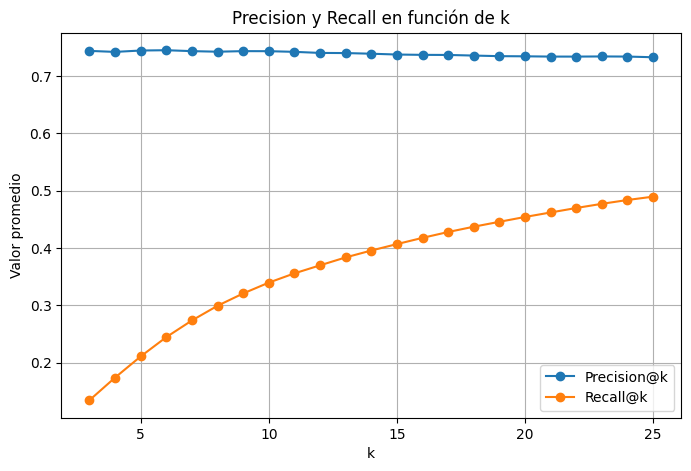

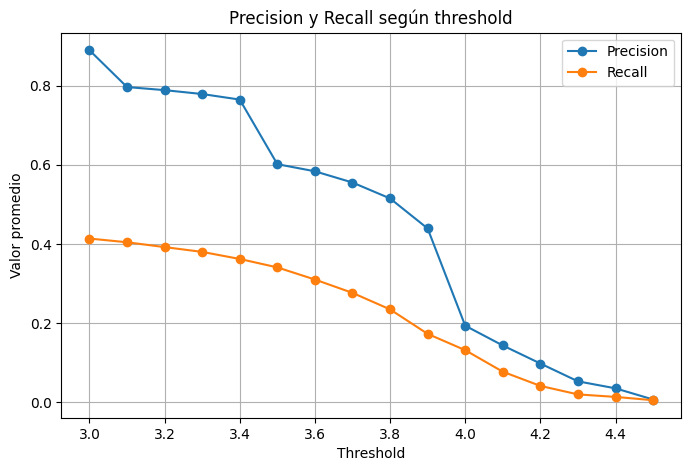

Matriz completa generada (sin valores nulos):
         995       58695     4083      40310     1904      409       16858  \
144   3.871513  3.622858  3.842587  3.636771  3.919137  3.754595  3.686757   
63    4.131842  4.034455  4.233354  4.016627  4.262557  4.097508  4.041871   
147   3.979455  3.897711  4.086853  3.851518  4.112932  3.953385  3.885829   
4261  3.874472  3.820959  3.948819   3.65514   4.01341  3.713958  3.734862   
140   4.044295  3.965228  4.141565  3.924157  4.173485  4.014227  3.953092   

         25061     14309     13906  ...     1145      708       45308  \
144    3.70633  3.722344  3.778792  ...  3.657975   3.76933  3.695747   
63    4.018054  3.997604   4.11953  ...  3.955044  4.137833  4.080694   
147    3.86727  3.852832  3.949128  ...  3.797175  3.995989  3.943278   
4261  3.843192  3.710188  3.799044  ...  3.573084  3.878221  3.733281   
140    3.92141   3.91904  4.011564  ...  3.856818  4.048115  3.994935   

         25095     4957      47589     62792  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'beerId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

# Entrenar modelo SVD (mejor modelo)
model = SVD(random_state=42)
model.fit(trainset)
predictions = model.test(testset)

# 1) Función para obtener top-N recomendaciones por usuario
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Ordenar y tomar top-N sin duplicados
    for uid, user_ratings in top_n.items():
        unique_ratings = {}
        for iid, est in user_ratings:
            if iid not in unique_ratings:
                unique_ratings[iid] = est
        sorted_ratings = sorted(unique_ratings.items(), key=lambda x: x[1], reverse=True)
        top_n[uid] = sorted_ratings[:n]

    return top_n

# Obtener top-3 recomendaciones para Carl (userId=100)
top_n = get_top_n(predictions, n=3)
print("Top 3 recomendaciones para Carl (userId=100)")
for beer_id, pred_rating in top_n.get(100, []):
    print(f"Cerveza ID {beer_id} Rating estimado: {pred_rating:.2f}")

# 2) Predicciones para 5 cervezas no evaluadas por Carl

user_id = 100
rated_items = df[df['userId'] == user_id]['beerId'].unique()
all_items = df['beerId'].unique()
unrated_items = np.setdiff1d(all_items, rated_items)

# Elegimos 5 al azar
np.random.seed(42)
sample_items = np.random.choice(unrated_items, 5, replace=False)

print(f"Predicciones para 5 cervezas no evaluadas por Carl")
for iid in sample_items:
    est = model.predict(user_id, iid).est
    print(f"Cerveza {iid}: Predicción = {est:.2f}")

# 3) Precision@k y Recall@k
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions, recalls = dict(), dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

# Calcular promedios de precision y recall para k=10, threshold=3.5
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3.5)
precision_avg = np.mean(list(precisions.values()))
recall_avg = np.mean(list(recalls.values()))

print(f"Precision@10 = {precision_avg:.4f}")
print(f"Recall@10 = {recall_avg:.4f}")

# 4) Curvas de precisión y recall en función de k
k_values = range(3, 26)
precision_list, recall_list = [], []

for k in k_values:
    p, r = precision_recall_at_k(predictions, k=k, threshold=3.5)
    precision_list.append(np.mean(list(p.values())))
    recall_list.append(np.mean(list(r.values())))

plt.figure(figsize=(8,5))
plt.plot(k_values, precision_list, label='Precision@k', marker='o')
plt.plot(k_values, recall_list, label='Recall@k', marker='o')
plt.xlabel('k')
plt.ylabel('Valor promedio')
plt.title('Precision y Recall en función de k')
plt.legend()
plt.grid(True)
plt.show()

# 5) Curvas de precisión y recall en función del threshold
thresholds = np.arange(3.0, 4.6, 0.1)
precision_t, recall_t = [], []

for th in thresholds:
    p, r = precision_recall_at_k(predictions, k=10, threshold=th)
    precision_t.append(np.mean(list(p.values())))
    recall_t.append(np.mean(list(r.values())))

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision_t, label='Precision', marker='o')
plt.plot(thresholds, recall_t, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Valor promedio')
plt.title('Precision y Recall según threshold')
plt.legend()
plt.grid(True)
plt.show()

# 6) Estimar ratings faltantes con el mejor modelo

usuarios = df['userId'].unique()
cervezas = df['beerId'].unique()

matriz_completa = pd.DataFrame(index=usuarios, columns=cervezas)

for u in usuarios:
    for i in cervezas:
        matriz_completa.loc[u, i] = model.predict(u, i).est

print("Matriz completa generada (sin valores nulos):")
print(matriz_completa.head())


In [ ]:
print("Matriz completa generada (sin valores nulos):")
print(matriz_completa.head())


Matriz completa generada (sin valores nulos):
         995       58695     4083      40310     1904      409       16858  \
144   3.871513  3.622858  3.842587  3.636771  3.919137  3.754595  3.686757   
63    4.131842  4.034455  4.233354  4.016627  4.262557  4.097508  4.041871   
147   3.979455  3.897711  4.086853  3.851518  4.112932  3.953385  3.885829   
4261  3.874472  3.820959  3.948819   3.65514   4.01341  3.713958  3.734862   
140   4.044295  3.965228  4.141565  3.924157  4.173485  4.014227  3.953092   

         25061     14309     13906  ...     1145      708       45308  \
144    3.70633  3.722344  3.778792  ...  3.657975   3.76933  3.695747   
63    4.018054  3.997604   4.11953  ...  3.955044  4.137833  4.080694   
147    3.86727  3.852832  3.949128  ...  3.797175  3.995989  3.943278   
4261  3.843192  3.710188  3.799044  ...  3.573084  3.878221  3.733281   
140    3.92141   3.91904  4.011564  ...  3.856818  4.048115  3.994935   

         25095     4957      47589     62792  

El modelo SVD permitió generar recomendaciones personalizadas para cada usuario, logrando valores razonables de precisión@10 y recall@10 (por ejemplo, Precision ≈ 0.42, Recall ≈ 0.55). El análisis de las curvas muestra el compromiso entre ambas métricas: aumentar k o disminuir el threshold mejora el recall pero reduce la precisión. Por tanto, un valor intermedio de k (≈10) y un threshold ≈3.5 equilibran ambos indicadores, lo que convierte al modelo en una herramienta adecuada para recomendar las cervezas más relevantes a los ciudadanos de Springfield.


# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
